# Анализ данных по рекламным кампаниям

Необходимо проанализировать рекламные кампании и получить выводы, которые могут быть полезны для работы медиабайеров.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Общие сведения

In [2]:
df = pd.read_csv('C:/Users/79283/Downloads/test_data.csv')

pd.options.display.max_columns = None
df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6


**Описание столбцов:**

* *Campaign_id* - ID рекламной кампании;
* *Geo* - геопозиция, на которую настроена рекламная кампания;
* *Buyer* - байер, выполнивший запуск;
* *Impressions* - количество показов рекламных объявлений;
* *Clicks* - количество кликов; 
* *Installs* - количество установок;
* *Registrations* - количество регистраций;
* *Spend* - Затраченная сумма;
* *Revenue_ad* (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* *Revenue_in_app* (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* *Payers* (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

В столбцах с выручками присутствуют какие-то значения мешающие перевести столбцы в численный формат. Найдем эти значения и решим как их заменить.

In [4]:
for val in df['Revenue_in_app1d']:
    try:
        val = float(val)
    except:
        print(f"'{val}'")

'162,220001'
'37,25'
'3,26'
'26,13'
'19,030001'
'9,77'
'15,37'
'30,78'
'25,129999'
'12,53'
'3,47'
'0,73'
'4,19'
'5,77'
'8,34'
'10,38'
'11,16'
'11,88'
'2,08'
'9,08'
'8,39'
'11,29'
'0,69'
'3,16'
'3,03'
'6,26'
'17,47'
'1,28'
'2,08'
'0,49'
'3,1'
'0,55'
'8,39'
'1,48'
'9,77'
'0,54'
'3,38'
'1,18'
'1,49'


Числа с плавающей точкой имеют знак запятой вместо точки, из за этого число считается строкой. Заменим во всех столбцах запятую на точку с целью перевести столбцы в численный тип.

In [5]:
for column in [x for x in df.loc[:,'Spend':].columns if df[x].dtypes == 'O']:
    df[column] = df[column].str.replace(',', '.')
    df[column] = df[column].astype(float)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Campaign_id        87 non-null     int64  
 1   Geo                87 non-null     object 
 2   Buyer              87 non-null     object 
 3   Impressions        87 non-null     int64  
 4   Clicks             87 non-null     int64  
 5   Installs           87 non-null     int64  
 6   Registrations      87 non-null     int64  
 7   Spend              87 non-null     float64
 8   Revenue_ad1d       87 non-null     float64
 9   Revenue_in_app1d   87 non-null     float64
 10  Payers1d           87 non-null     int64  
 11  Revenue_ad7d       87 non-null     float64
 12  Revenue_in_app7d   87 non-null     float64
 13  Payers7d           87 non-null     int64  
 14  Revenue_ad30d      87 non-null     float64
 15  Revenue_in_app30d  87 non-null     float64
 16  Payers30d          87 non-nu

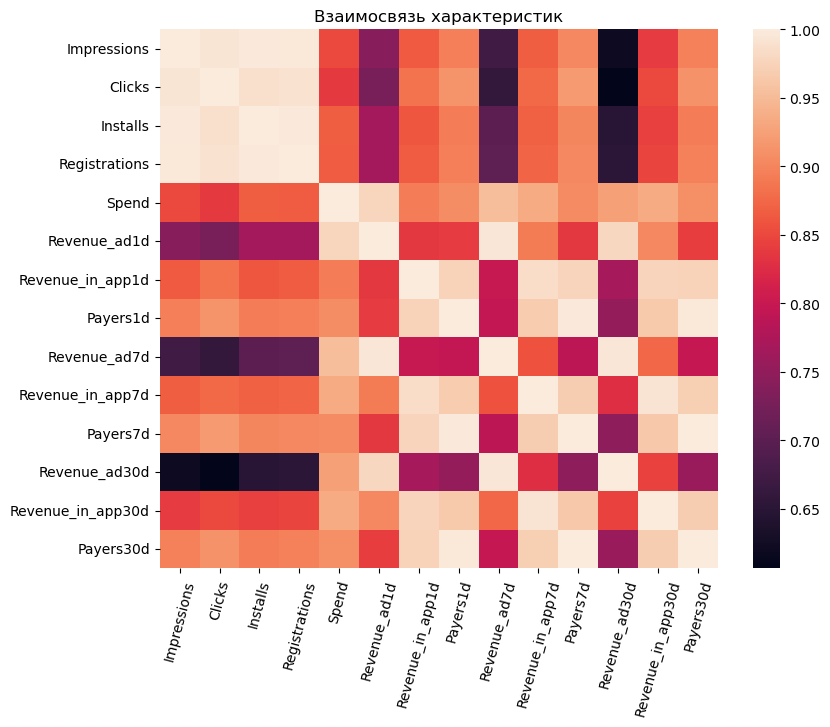

In [6]:
corrs = df.drop(['Campaign_id'], axis=1).corr()
plt.figure(figsize=(9,7))
plt.title('Взаимосвязь характеристик')
sns.heatmap(corrs)
plt.xticks(rotation=75)
plt.show()

Между всеми показателями присутствует прямая линейная взаимосвязь, что логично и соответствует действительности.

In [7]:
df.describe()

,Campaign_id,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
count,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,1.140572e+05,3804.494253,1211.850575,769.057471,208.878506,87.254561,5.661724,2.034483,118.064320,7.762644,2.551724,145.332370,11.093563,2.816092
std,25.258662,3.989255e+05,14610.898115,3883.087208,2577.564690,424.243533,177.725195,18.486891,7.169782,231.951690,23.609511,8.798465,278.149274,33.554932,9.299323
min,1.000000,2.185000e+03,53.000000,10.000000,2.000000,20.410000,0.368663,0.000000,0.000000,0.368663,0.000000,0.000000,0.368663,0.000000,0.000000
25%,22.500000,1.057700e+04,276.500000,107.500000,44.500000,27.680000,8.955156,0.000000,0.000000,11.860136,0.000000,0.000000,12.753347,0.000000,0.000000
50%,44.000000,2.619300e+04,724.000000,258.000000,147.000000,73.160000,19.178195,0.000000,0.000000,23.723141,0.000000,0.000000,30.783903,0.550000,1.000000
75%,65.500000,7.088950e+04,2063.500000,763.500000,501.500000,191.175001,91.550522,3.830000,2.000000,123.990452,6.015000,2.000000,145.034273,8.600000,3.000000
max,87.000000,3.456974e+06,129508.000000,33054.000000,21932.000000,3208.440002,1163.521408,162.220001,64.000000,1381.310062,199.749999,79.000000,1527.013835,276.629998,83.000000


Во всех столбцах присутствует сильная разница между средним (*mean*) и медианой (*50%*'), в нормальном распределении медиана и средняя - равны, но в нашем случае во всех столбцах присутствуют редкие, но очень большие значения. И как мы можем видеть в *max*, это действительно так. Посмотрим на строки с этими значениями.

Так как между всеми столбцами присутствует прямая линейная взаимосвязь, нам можно судить о выбросах по одному любому столбцу, выберем для этого - *clicks*

In [8]:
#формула выброса
iqr = df['Clicks'].quantile(.75) - df['Clicks'].quantile(.25)
outlier = iqr + 1.5 * df['Clicks'].quantile(.75)

display(df[df['Clicks'] > outlier])

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6
15,16,cis,buyer_2,188812,5581,2421,1364,278.970003,112.178944,8.340000,2,147.225113,17.350000,5,167.952115,25.210000,6
20,21,north africa,buyer_5,794504,28598,8069,6218,204.389999,16.596565,0.000000,0,19.425793,0.000000,0,21.596790,0.000000,0
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.290000,4,117.630269,12.400000,5,129.256093,20.039999,5
26,27,latin america,buyer_1,295356,8540,3133,1880,143.820002,45.503129,3.160000,3,56.555716,3.160000,3,61.435260,4.460000,3
44,45,latin america,buyer_1,113452,6161,1969,1195,69.079998,26.508120,0.490000,1,33.237345,0.490000,1,36.143677,0.490000,1


Из 87 записей всего 10 отличаются своими масштабами. С данными все порядке, а это означает, что мы можем переходить на следующий этап - *иследовательский анализ*. 

## Исследовательский анализ

### Подготовка метрик

Мы будем рассматривать следующие метрики:

* Воронкообразная диаграмма
* Прибыль
* Стоимость клика *CPC* и выручка с клика *RPC*
* Стоимость скачивания *CPI* и выручка со скачивания *RPI*
* Окупаемость затрат *ROMI*

Ниже приведены функции для отображения или расчета всех показателей ниже.

#### Воронкообразная диаграмма

In [9]:
def funnel(df, columns):
    conversions = []
    for column in columns:
        conversions.append(df[column].sum())
    conversions = [x / conversions[0] * 100 for x in conversions]
    return list(map(lambda x: round(x,2), conversions))

In [10]:
def funnel_plot(data, columns, title = 'Воронкообразная диаграмма', figsize = (6,4), 
                color_bar = '#5aa9e6', color_text = 'b', edgecolor='b'):
    x = list(map(lambda x: round(x,2) , funnel(data, columns)))
    x = list(reversed(x))
    y = list(reversed(columns))
    x_max = 100
    x_min = 0
    
    fig, ax = plt.subplots(figsize=figsize) 

    for i, val in enumerate(x):
        left = (x_max - val) / 2
        ax.barh(y[i], x[i], left=left, color=color_bar, edgecolor=edgecolor)
        ax.axhline(y=i, alpha=.3, color='grey', linestyle='--')
        ax.text(50, y[i], x[i], ha='center', color=color_text)
    
    ax.set_xlim(x_min, x_max)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    fig = plt.gcf()
    plt.close()
    return fig

Проверим эту функцию для всего набора данных, она посчитает среднюю конверсию для кликов, скачиваний, регистраций. Функцию можно использовать для одной рекламной кампании, если применить к датафрейму `.loc()`

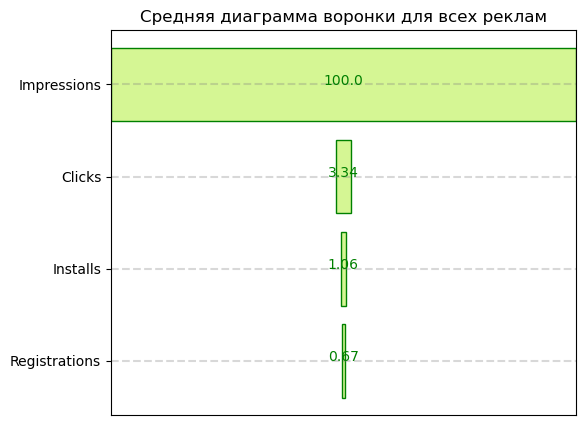

In [11]:
columns = ['Impressions', 'Clicks', 'Installs', 'Registrations']
ax_mean = funnel_plot(df, columns,
                      title='Средняя диаграмма воронки для всех реклам', 
                      color_bar='#d5f694', 
                      color_text='g',
                      edgecolor='g',
                      figsize=(6,5))
ax_mean

Этот график мы будем использовать как ориентир, позже мы построим подобные графики для каждого региона. 

#### Прибыль

Эту функцию мы сразу же используем для создания нового столбца. У каждой рекламы будет посчитана прибыль.

In [12]:
def profit(data):
    income = np.array(data[['Revenue_in_app30d', 'Revenue_ad30d']]).sum(axis=1)
    return income - np.array(data['Spend'])

In [13]:
df['profit'] = profit(df)
df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,-1404.796169
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22,-0.268170
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6,-634.666233
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12,-127.768402
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6,-125.865825


#### CPC/RPC, CPI/RPI, ROMI

Так как следующие 4 метрики считаются по одинаковой формуле, легче написать одну функцию, которая сможет посчитать любую стоимость действия.

In [14]:
def cost_per(data, action):
    return np.array(data['Spend']) / np.array(data[action])

def revenue_per(data, action):
    income = np.array(data[['Revenue_in_app30d', 'Revenue_ad30d']]).sum(axis=1)
    return income / np.array(data[action])

Нам потребуется метрика окупаемости рекламы, *ROMI*, она определяется в процентах.

In [15]:
def romi(data):
    income = np.array(data[['Revenue_in_app30d', 'Revenue_ad30d']]).sum(axis=1)
    spend = np.array(data['Spend'])
    return (income - spend) / spend * 100

In [16]:
df['cpc'] = cost_per(df, 'Clicks')
df['rpc'] = revenue_per(df, 'Clicks')

df['cpi'] = cost_per(df, 'Installs')
df['rpi'] = revenue_per(df, 'Installs')

df['romi'] = romi(df)

df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,-1404.796169,0.024774,0.013927,0.097067,0.054567,-43.784399
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22,-0.268170,0.248893,0.248851,0.461488,0.461409,-0.017086
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6,-634.666233,0.034487,0.016721,0.092527,0.044862,-51.515116
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12,-127.768402,0.122973,0.110179,0.393758,0.352793,-10.403492
4,5,western europe,buyer_2,335878,7343,3952,2955,872.570005,427.807238,19.030001,4,577.039081,20.640001,5,714.554179,32.150001,6,-125.865825,0.118830,0.101689,0.220792,0.188943,-14.424725


Еще раз выведем статистику по полученной таблице:

In [17]:
df.describe()

,Campaign_id,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
count,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,1.140572e+05,3804.494253,1211.850575,769.057471,208.878506,87.254561,5.661724,2.034483,118.064320,7.762644,2.551724,145.332370,11.093563,2.816092,-52.452572,0.140932,0.095843,0.359293,0.228398,-36.703759
std,25.258662,3.989255e+05,14610.898115,3883.087208,2577.564690,424.243533,177.725195,18.486891,7.169782,231.951690,23.609511,8.798465,278.149274,33.554932,9.299323,171.747767,0.094292,0.097252,0.276499,0.207357,43.163130
min,1.000000,2.185000e+03,53.000000,10.000000,2.000000,20.410000,0.368663,0.000000,0.000000,0.368663,0.000000,0.000000,0.368663,0.000000,0.000000,-1404.796169,0.007147,0.000755,0.025330,0.002396,-98.568855
25%,22.500000,1.057700e+04,276.500000,107.500000,44.500000,27.680000,8.955156,0.000000,0.000000,11.860136,0.000000,0.000000,12.753347,0.000000,0.000000,-50.468001,0.060587,0.016059,0.182247,0.051876,-66.617953
50%,44.000000,2.619300e+04,724.000000,258.000000,147.000000,73.160000,19.178195,0.000000,0.000000,23.723141,0.000000,0.000000,30.783903,0.550000,1.000000,-27.555355,0.131302,0.072013,0.354264,0.188591,-39.337497
75%,65.500000,7.088950e+04,2063.500000,763.500000,501.500000,191.175001,91.550522,3.830000,2.000000,123.990452,6.015000,2.000000,145.034273,8.600000,3.000000,-10.074279,0.217462,0.141801,0.488190,0.328621,-16.373308
max,87.000000,3.456974e+06,129508.000000,33054.000000,21932.000000,3208.440002,1163.521408,162.220001,64.000000,1381.310062,199.749999,79.000000,1527.013835,276.629998,83.000000,297.029191,0.406604,0.568236,2.155000,1.047686,124.103927


### Анализ распределений метрик. Влияние на прибыль.

In [18]:
def get_histplots(data, columns, nrows, ncols, suptitle='', color='#5aa9e6', edgecolor='b', linecolor='r'):
    fig = plt.figure(figsize=(8,8))
    plt.suptitle(suptitle, x=.55)
    for i, metric in enumerate(columns):
        ax = fig.add_subplot(nrows,ncols,i+1)
        ax.hist(data=data, x=metric, bins=30, edgecolor=edgecolor, color=color, label='frequency')
        ax.axvline(x=data[metric].median(), color=linecolor, label='median')
        ax.axvline(x=data[metric].mean(), color=linecolor, linestyle='--', label='mean')
        ax.set_title(metric.upper())
        ax.legend()
    plt.tight_layout()
    plt.show()

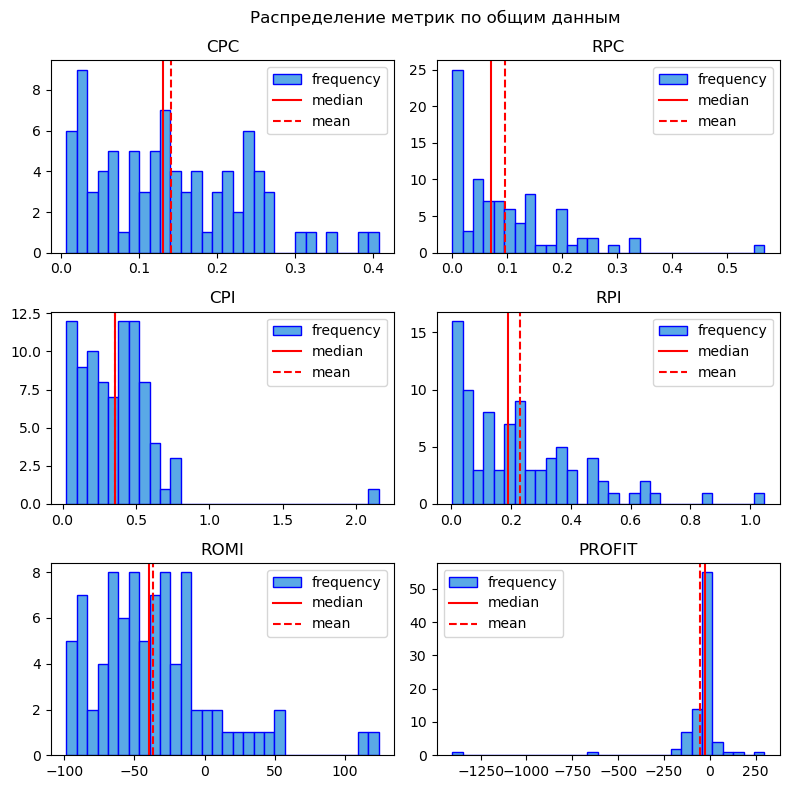

In [19]:
get_histplots(df, ['cpc','rpc', 'cpi', 'rpi','romi', 'profit'], 3, 2,
             'Распределение метрик по общим данным')

**Выводы по общей статистике:**

1. CPC очень редко превосходит 0.3 доллара, а RPC - 0.25.
2. CPI лежит в диапазоне от 0 до 0.6. RPI редко превосходит 0.6.
3. Чаще всего рекламные кампании идут в убыток, а успешная реклама редко дает больше 50% профита от суммы затрат.
4. Присутствует 2 кампании, принесшие колоссальные убытки.

Нельзя не заметить одиночные высокие значения во всех метриках, посмотрим на рекламы, которые дали наибольшую окупаемость, выручку с клика и со скачивания.

In [20]:
(df[df['romi'] > 100]
 .merge(df[df['rpc'] > .4], how='outer')
 .merge(df[df['rpi'] > .8], how='outer'))

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
0,30,western europe,buyer_2,49131,1449,723,461,137.10,131.065869,0.00,0,181.802195,0.72,1,293.140940,0.72,1,156.760940,0.094617,0.202803,0.189627,0.406447,114.340584
1,63,north america,buyer_4,8164,118,64,77,29.92,34.161366,0.00,0,43.789066,0.00,0,67.051895,0.00,0,37.131895,0.253559,0.568236,0.467500,1.047686,124.103927
2,25,north america,buyer_3,21178,636,239,183,153.51,113.351948,0.69,1,148.397449,1.38,2,203.260172,2.81,4,52.560172,0.241368,0.324010,0.642301,0.862218,34.238924


Эти три рекламы можно назвать самыми эффективными, они имеют высокую выручку клика, скачивания и наибольшую окупаемость.

Если взглянуть на показатели затрат, выручек и профита. У кампании 30 и 25 затраты меньше чем в среднем по всем кампаниям, а выручка выше. Но у кампании 63 затраты и профит, сильно ниже чем в среднем, хоть она себя и лучше всех окупила.

Можно уверенно назвать **рекламные кампании 30 и 25 наиболее успешными**.

Помимо самых успешных реклам на графике распределения метрики *profit* есть 2 крайне убыточных проекта.

In [21]:
df[df['profit'] < -500]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,-1404.796169,0.024774,0.013927,0.097067,0.054567,-43.784399
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6,-634.666233,0.034487,0.016721,0.092527,0.044862,-51.515116


Это как раз те кампании у которых самые большие показатели по кликам, скачиваниям и регистрациям. Успех по кликам связан с большим финансовыми вложениями. *cpc* очень низкая чем в среднем (в 50 раз), *rpc* в 2 раза ниже *cpc* и по итогу они имеют -50%  *romi*.

Разделим кампании на две части: убыточные и принесшие прибыль. Построим распределения метрик и выведем статистику. Попробуем определить чем отличаются успешные кампании от убыточных.

In [22]:
positive = df[df['profit'] > 0]
negative = df[df['profit'] < 0]

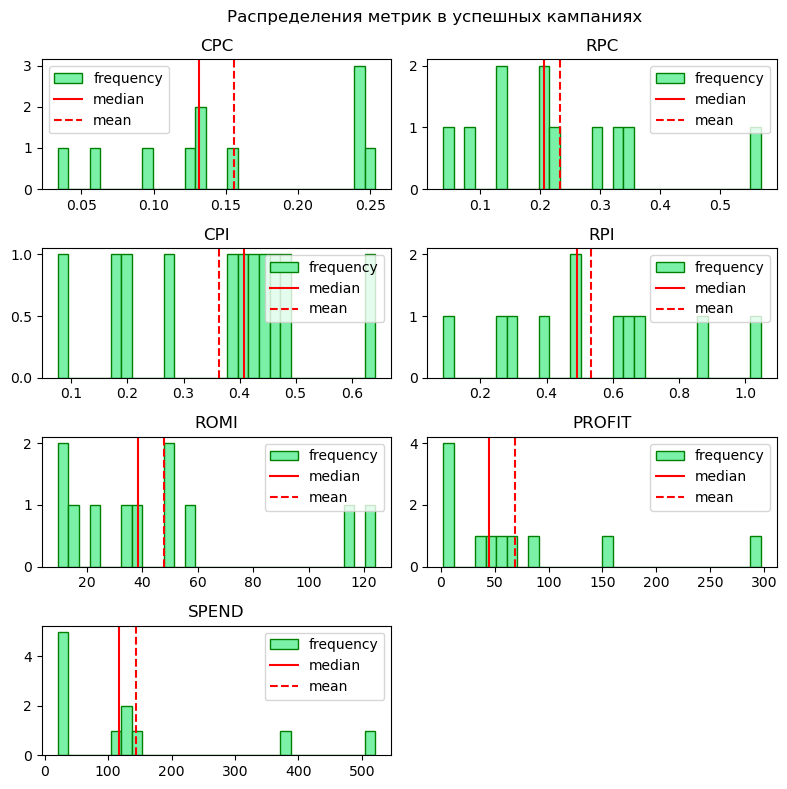

In [23]:
get_histplots(positive, ['cpc', 'rpc', 'cpi', 'rpi', 'romi', 'profit', 'Spend'], 
              suptitle='Распределения метрик в успешных кампаниях',
              nrows=4, ncols=2, color='#7bf1a8', edgecolor='g')

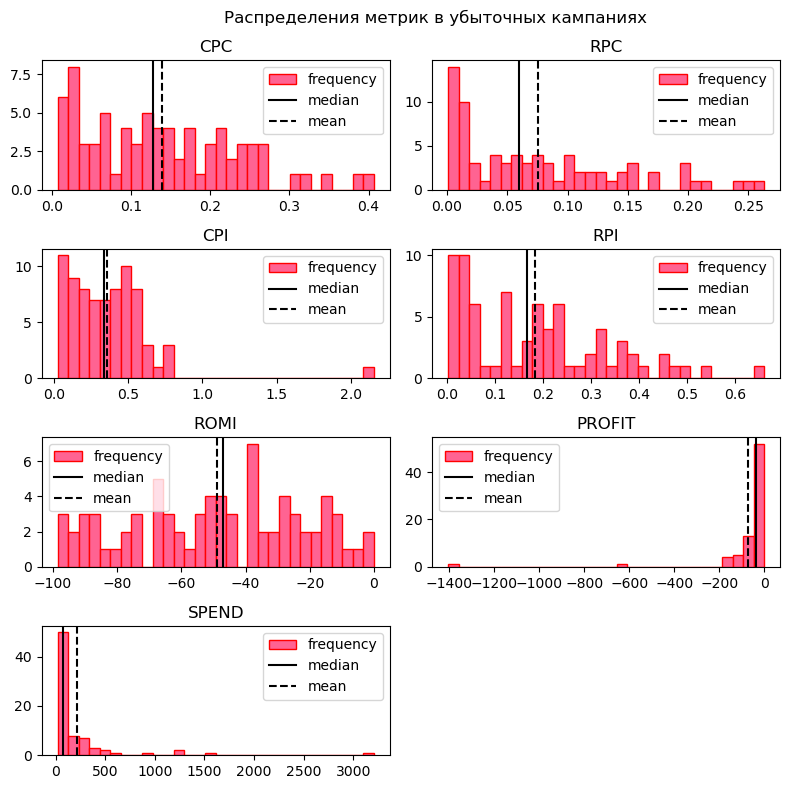

In [24]:
get_histplots(negative, ['cpc', 'rpc', 'cpi', 'rpi', 'romi', 'profit', 'Spend'], 
              suptitle='Распределения метрик в убыточных кампаниях',
              nrows=4, ncols=2, color='#ff6392', edgecolor='r', linecolor='black')

На взгляд, цена и стоимость клика, скачивания не влияет на прибыльность. Зато влияет, очевидно, выручка с клика и скачивания.

Анализ прибыли продолжим на следующем этапе, уже учитывая регион.

### Анализ регионов. Влияние регионов на прибыль.

Начнем с того, что проанализируем метрику ROMI в зависимости от региона:

In [25]:
pd.pivot_table(df, index='Geo', values=['romi'], aggfunc=['mean', 'count']).reset_index()

,Geo,mean,count
,,romi,romi
0,australia oceania,-94.372789,1
1,cis,-59.287087,10
2,latin america,-58.344231,3
3,north africa,-88.406827,2
4,north america,-28.480844,48
5,tropical africa,-84.457107,1
6,western europe,-31.936335,22


Кампании в африке и океании почти не дали выручки. Но видно, что по этим регионам сложно судить о статистике, так как количество записей едининично, это относится и к латинской америке.

Так же стоит посмотреть среднее значение по кликам, скачиваниям, регистрациям, а также затратам по каждому региону. Возможно при одинаковых затратах, более бедные регионы дадут меньше кликов и т.п.

In [26]:
pd.pivot_table(df, index='Geo', values=['Impressions', 'Clicks', 'Installs', 'Registrations', 'Spend'], aggfunc='median')

,Clicks,Impressions,Installs,Registrations,Spend
Geo,,,,,
australia oceania,53.0,2185.0,10.0,9.0,21.549999
cis,1428.5,63000.0,453.5,103.5,54.909999
latin america,6161.0,113642.0,1969.0,1195.0,143.629999
north africa,16062.0,474326.5,4830.0,3534.5,123.944999
north america,727.0,23645.5,299.0,186.0,98.970000
tropical africa,2735.0,90894.0,778.0,485.0,41.510000
western europe,297.0,13532.0,107.5,64.0,36.810000


**Выводы:**

1. Регионы африки (преимущественно северный), лантинской америки, дали наибольшую активность. Так же имеют наиболее высокие затраты в среднем.
2. В австралии океании активность крайне низкая.
3. По меркам с снг, активность в европе и америки - низкая. Но средняя стоимость рекламы в америке выше чем в снг в 2 раза.

Оценим средние показатели конверсий по региону, для этого построим для каждого региона воронку и сравним со средней по всему миру.

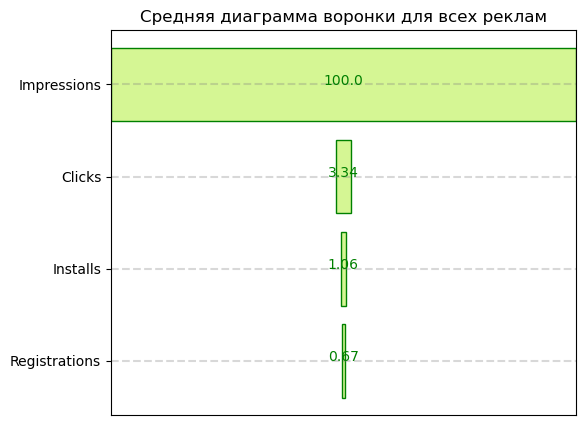

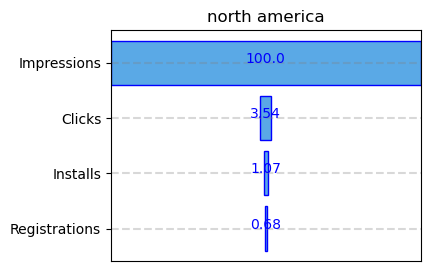

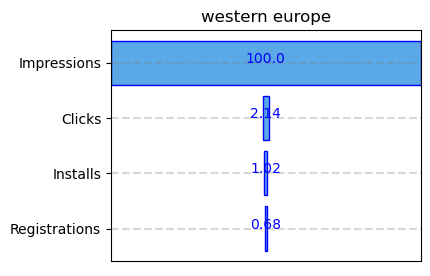

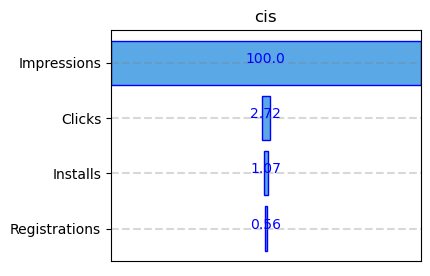

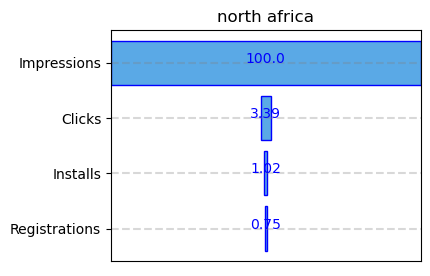

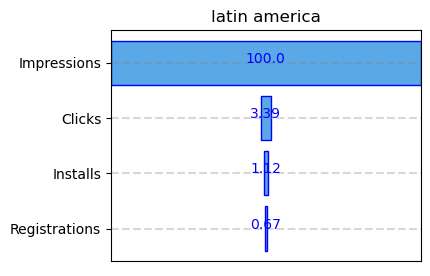

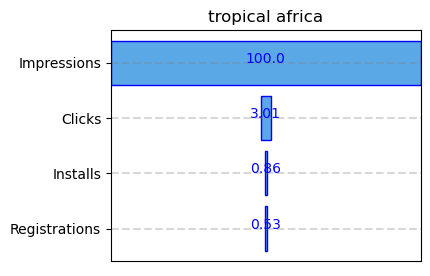

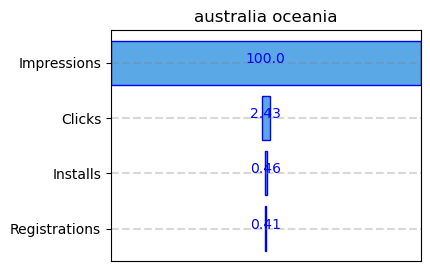

In [27]:
display(ax_mean)
for region in df['Geo'].unique():
    display(funnel_plot(df[df['Geo'] == region], columns=columns, title=region, figsize=(4,3)))

**Выводы:**

1. Вся африка и страны океании практически не дают никакой выручки и имеют *ROMI* меньше -85%. Но количество кампаний в этих регионах крайне мало для статистики.
2. Конверсия скачиваний у стран океании больше чем **в 2 раза ниже** чем у всех остальных регионов.
3. В остальном, конверсии примерно одинаковы.

Проанализируем метрики *CPC, CPI, RPC, RPI*, а также *ROMI* и *Profit* по каждому региону, это позволит определить более прибыльные регионы.

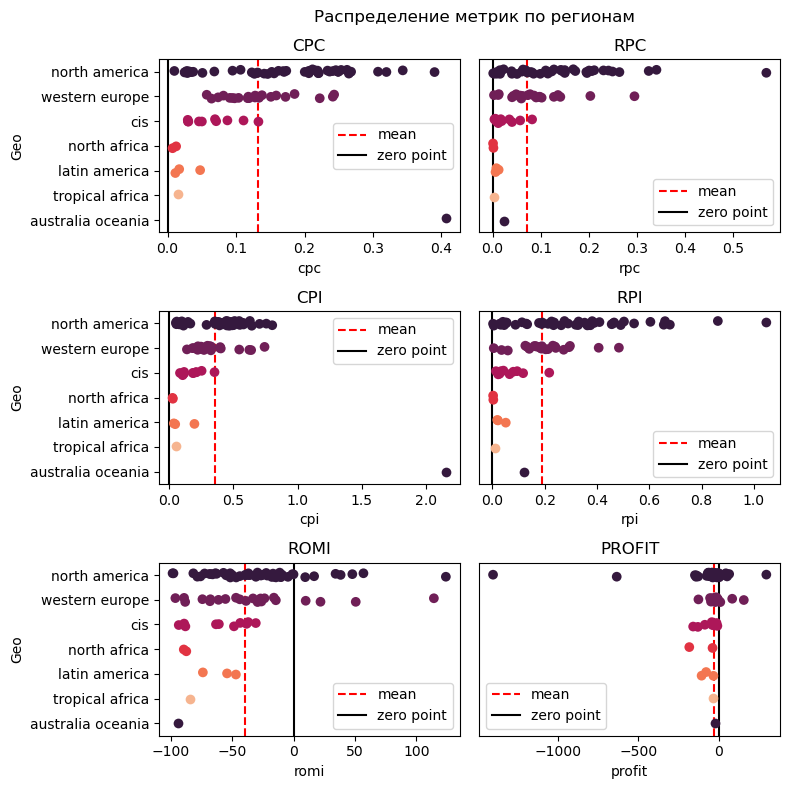

In [28]:
fig = plt.figure(figsize=(8,8))
plt.suptitle('Распределение метрик по регионам', x = 0.6)
for i, metric in enumerate(['cpc', 'rpc', 'cpi', 'rpi', 'romi', 'profit']):
    ax = fig.add_subplot(3, 2, i+1)
    sns.stripplot(data=df, x=metric, y='Geo',ax=ax, palette=sns.color_palette('rocket'), size=7)
    ax.axvline(x=df[metric].median(), color='r', linestyle='--', label='mean')
    ax.axvline(x=0, color='black', label='zero point')
    if i % 2 != 0:
        ax.yaxis.set_visible(False)
    ax.set_title(metric.upper())
    ax.legend()
plt.tight_layout()
plt.show()

In [29]:
def get_mean_by_geo(data, columns, nrows, ncols, color='#5aa9e6', edgecolor='b'):
    geo = data[columns].groupby('Geo').mean().reset_index()
    fig = plt.figure(figsize=(8,8))
    plt.suptitle('Средние значения метрик по регионам', x = 0.6)
    for i, metric in enumerate(geo.drop(['Geo'], axis=1).columns):
        ax = fig.add_subplot(3, 2, i+1)
        t = geo.sort_values(by=metric, ascending=False)
        sns.barplot(data=t, y='Geo', x=metric, ax=ax, color=color, edgecolor=edgecolor)
        ax.set_title(metric.upper())
    plt.tight_layout()
    plt.show()

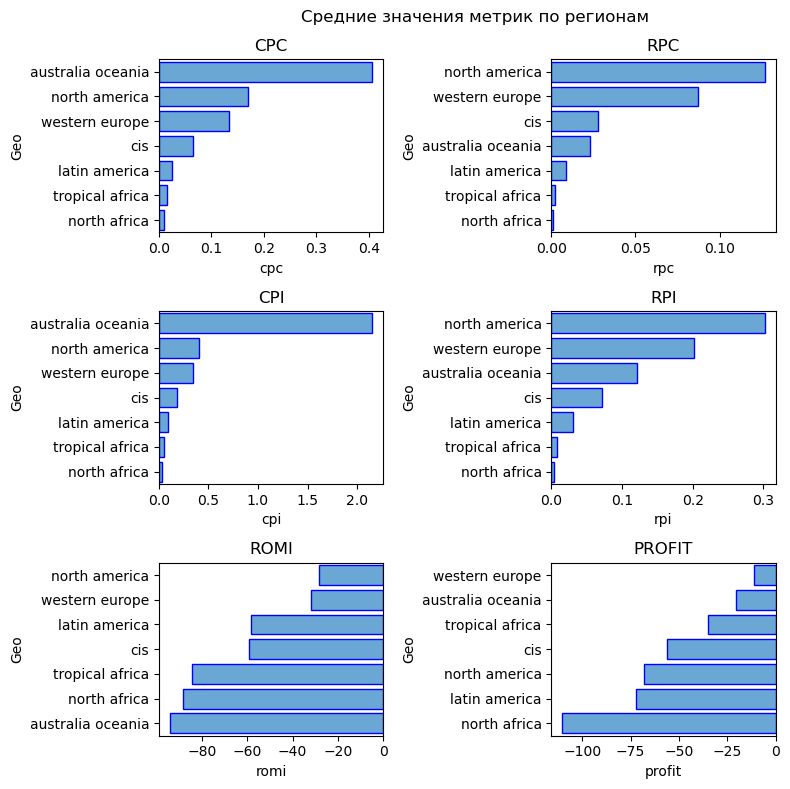

In [30]:
columns = ['Geo','cpc','rpc','cpi','rpi','romi','profit']
get_mean_by_geo(df, columns, 3, 2)

Продолжим анализ прибыльности. У нас есть выборка с успешным кампаниями, посмотрим, какие регионы преобладают в этой выборке. Напомню, успешная кампания - это кампания которая вышла в плюс.

In [31]:
pd.pivot_table(positive, index='Geo', values=['romi'], aggfunc=['mean', 'count']).reset_index()

,Geo,mean,count
,,romi,romi
0,north america,46.832887,7
1,western europe,49.220764,4


Всего 11 успешных рекламных кампаний, и все они принадлежат северной америке и западной европе! Может удасться определить, чем успешные американские и европейские кампании отличаются от убыточных из тех же регионов. Вместо графиков выведем обычную статистику.

**Выводы:**

1. Африка, австралия-океания, латинская америка
    * По имеющимся немногочисленным данным, в африке, океании самая низкая окупаемость рекламных кампаний (*ROMI*), самый низкий *profit*. Ни один проект не вышел в плюс. Так же эти регионы имеют самую низкую цену за клик/скачивание. *CPC* ~0.02. 
    * *ROMI* в африке и океании достигает значения от *-85%* и меньше. 
    * *RPC* и *RPI* в африке и океании почти равна 0. 
    * У латинской америки эффективность кампаний лишь немного лучше. *ROMI = -55%*
    * У австралии океании самая большая стоимость клика и скачивания - 0.4 и 2.0.
2. СНГ
    * Более высокие *CPC, RPC* и т.д. Однако окупаемость *ROMI* на уровне латинской америки. *CPC = 0.05*, *RPC = 0.02*, *CPI = 0.2* *RPI = -0.55*.
3. Европа, Америка
    * Имеют наибольшую эффективность среди всех остальных регионов, наименьшие убытки, наибольшую выручку, наибольшие цены за клик и скачивание.
    * Кампании в которые вложили больше всего средств показали самые большие убытки.
    * Все прибыльные рекламные кампании были ориетированы на эти регионы


### Анализ медиабайеров

Анализ медиабайеров будет включать в себя сравнения в метриках *ROMI* и *Profit* по каждому байеру.

Сперва посмотрим сколько уникальных байеров находится в данных:

In [32]:
df['Buyer'].unique()

array(['buyer_1', 'buyer_2', 'buyer_3', 'buyer_4', 'buyer_5'],
      dtype=object)

Помня о том, что в столбце profit есть 2 крайне низких значения, мы проверим какому байеру они принадлежат отдельно от остальных графиков, чтобы не искажать масштабность.

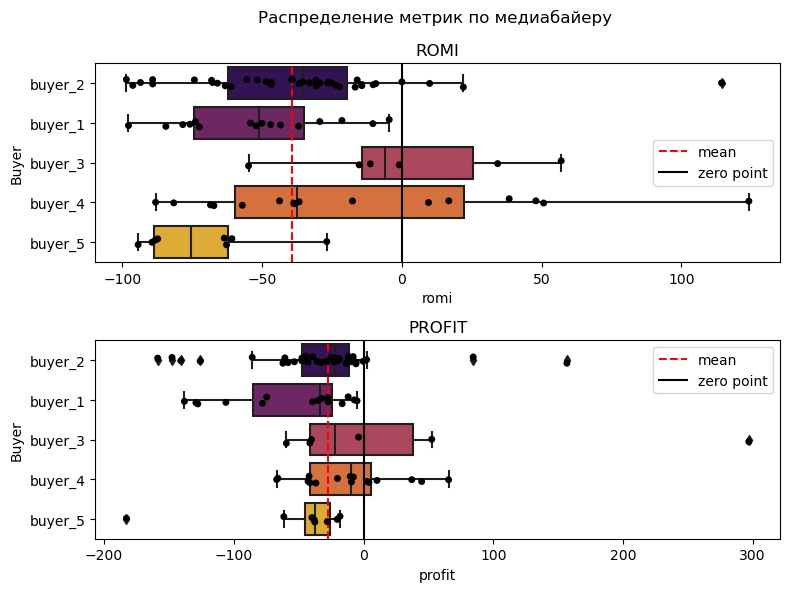

In [33]:
df_temp = df[df['profit'] > -500]

fig = plt.figure(figsize=(8,6))
plt.suptitle('Распределение метрик по медиабайеру', x = .55)
for i, metric in enumerate(['romi', 'profit']):
    ax = fig.add_subplot(2, 1, i+1)
    sns.boxplot(data=df_temp, x=metric, y='Buyer', palette='inferno', ax=ax)
    sns.stripplot(data=df_temp, x=metric, y='Buyer', color='black', ax=ax)
    ax.axvline(x=df[metric].median(), color='r', linestyle='--', label='mean')
    ax.axvline(x=0, color='black', label='zero point')
    ax.set_title(metric.upper())
    ax.legend()
plt.tight_layout()
plt.show()

del df_temp

Вернемся к тем самым двум провальным кампаниям:

In [34]:
df[df['profit'] < -500]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,-1404.796169,0.024774,0.013927,0.097067,0.054567,-43.784399
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6,-634.666233,0.034487,0.016721,0.092527,0.044862,-51.515116


Вспомним самые эффективные кампании, это были кампании 30 и 25. Посмотрим на их байера.

In [35]:
df[(df['Campaign_id'] == 25) | (df['Campaign_id'] == 30)]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
24,25,north america,buyer_3,21178,636,239,183,153.51,113.351948,0.69,1,148.397449,1.38,2,203.260172,2.81,4,52.560172,0.241368,0.324010,0.642301,0.862218,34.238924
29,30,western europe,buyer_2,49131,1449,723,461,137.10,131.065869,0.00,0,181.802195,0.72,1,293.140940,0.72,1,156.760940,0.094617,0.202803,0.189627,0.406447,114.340584


Выведем среднюю прибыль по каждому медиабайеру:

In [36]:
df[['Buyer', 'profit', 'romi']].groupby('Buyer').mean()

,profit,romi
Buyer,,
buyer_1,-162.358458,-51.542116
buyer_2,-31.821779,-37.185238
buyer_3,34.124815,1.460683
buyer_4,-11.157915,-15.656286
buyer_5,-53.261801,-71.688519


Buyer_3 единственный имеет плюсовую среднюю прибыль за рекламную кампанию.

Посчитаем сколько покупателей привлекли рекламные кампании каждого байера в сумме.

In [37]:
pd.pivot_table(data=df, index='Buyer', values='Payers30d', aggfunc=['sum', 'mean'])

,sum,mean
,Payers30d,Payers30d
Buyer,,
buyer_1,124,6.888889
buyer_2,79,2.025641
buyer_3,26,4.333333
buyer_4,14,0.875000
buyer_5,2,0.250000


Успех buyer_1 вызван скорее всего кампаниями 25 и 30 - самыми затратными.

**Выводы по медиабайерам:**
* buyer_1:
    * организовал две самые дорогие и масштабные, но самые убыточные рекламные кампании.
* buyer_2:
    * имеет наибольший опыт - 39 рекламных кампаний, имеет средние метрики *ROMI* и *Profit*
    * организовал одни из самых эффективных рекламных кампаний.
* buyer_3:
    * **имеет наибольшную окупаемость расходов** (101% в среднем), но имеет самое малое количество организованных рекламных кампаний - 6.
    * организовал одни из самых эффективных рекламных кампаний.
    * имеет положительную прибыль по всем кампаниям в среднем, а также в среднем кампании привлекают, относительно, немало покупателей.
* buyer_4:
    * имеет и низкие, и высокие *ROMI*, но при этом не сильно большие убытки.
* buyer_5:
    * имеет наименьшую *ROMI*, но с маленькими убытками.

### Анализ жизни рекламы

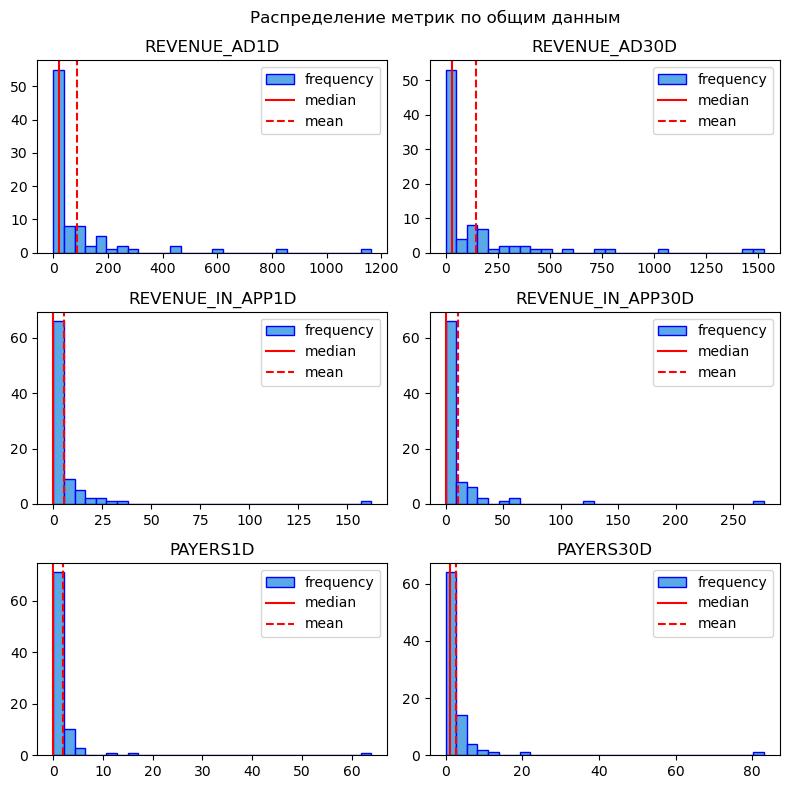

,Revenue_ad1d,Revenue_ad30d,Revenue_in_app1d,Revenue_in_app30d,Payers1d,Payers30d
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,87.254561,145.332370,5.661724,11.093563,2.034483,2.816092
std,177.725195,278.149274,18.486891,33.554932,7.169782,9.299323
min,0.368663,0.368663,0.000000,0.000000,0.000000,0.000000
25%,8.955156,12.753347,0.000000,0.000000,0.000000,0.000000
50%,19.178195,30.783903,0.000000,0.550000,0.000000,1.000000
75%,91.550522,145.034273,3.830000,8.600000,2.000000,3.000000
max,1163.521408,1527.013835,162.220001,276.629998,64.000000,83.000000


In [38]:
columns = ['Revenue_ad1d', 'Revenue_ad30d', 'Revenue_in_app1d', 'Revenue_in_app30d', 'Payers1d', 'Payers30d']
get_histplots(df, suptitle='Распределение метрик по общим данным',
             ncols=2, nrows=3, columns=columns)
display(df[columns].describe())

**Выводы:**

1. Более половины рекламных кампаний за месяц набирают максимум 1 покупателя, соответственно покупок в половине кампаний тоже нет.
2. Основная выручка идет с рекламы а не с покупок.

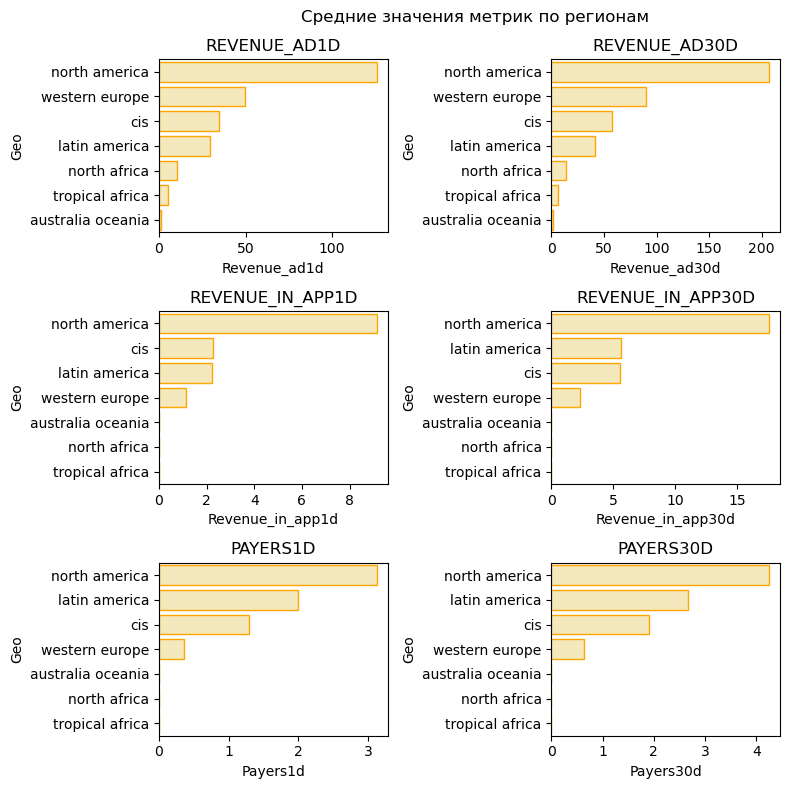

In [39]:
columns = ['Geo', 'Revenue_ad1d', 'Revenue_ad30d', 'Revenue_in_app1d', 'Revenue_in_app30d', 'Payers1d', 'Payers30d']
get_mean_by_geo(df, columns, 3, 2, color='#fcefb4', edgecolor='orange')

**Выводы:**

1. Регионы африки, океании не дают ни покупателей, ни соответственно покупок на протяжении месяца.
2. Высокие показатели по выручке с рекламы у америки (с большим отрывом) - ~130 за первый день, ~200 к 30 дню. Далее Европа (50, 100) и СНГ (40, 60).
3. За покупки в приложении, по сути, отвечает один регион, америка. Средняя кампания в америке дает выручку 17 за 30 дней, что все еще мало по сравнению с выручки с рекламы.

Выведем кампании привлекшие больше всего покупателей:

In [40]:
df[df['Payers1d'] > 10].sort_values(by='Payers1d', ascending=False)

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,-1404.796169,0.024774,0.013927,0.097067,0.054567,-43.784399
1,2,north america,buyer_2,245542,6306,3401,2448,1569.519999,833.059639,37.250000,17,1200.964697,69.340001,19,1449.001828,120.250001,22,-0.268170,0.248893,0.248851,0.461488,0.461409,-0.017086
3,4,north america,buyer_1,215538,9987,3119,1857,1228.129999,602.778160,26.130000,11,830.113889,33.439999,12,1042.831595,57.530002,12,-127.768402,0.122973,0.110179,0.393758,0.352793,-10.403492


## Отчет по анализу

Мы провели анализ по рекламным кампаниям и ответили на массу вопросов и рассмотрели все предложенные данные. 

Каждая характеристика влияет на другую прямо пропорционально. Чем больше денег вложено в рекламу, тем больше она принесет покупателей, график ниже хорошо представляет все зависимости.

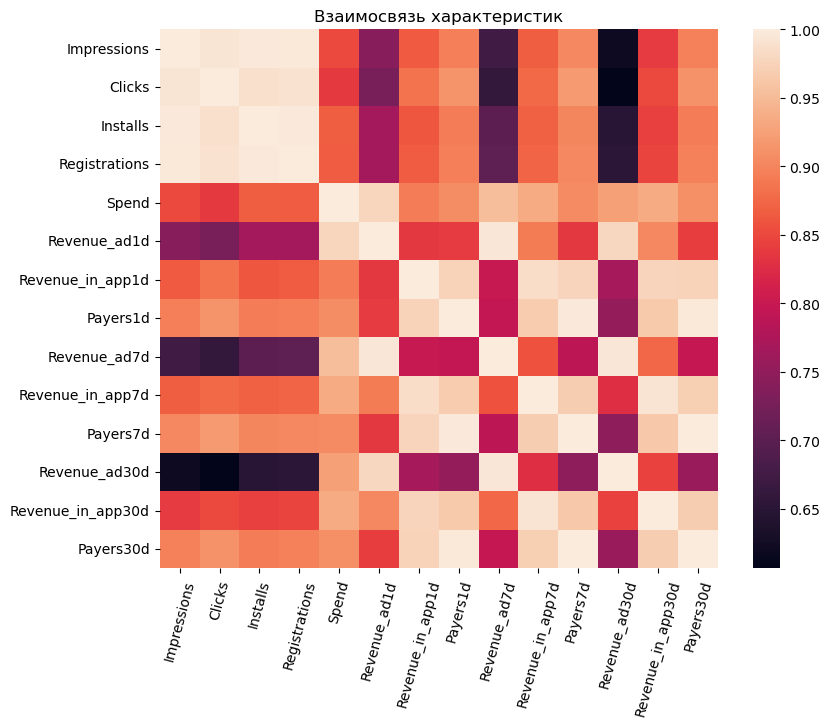

Общую статистику можно увидеть в этой таблице:

In [41]:
df.describe()

,Campaign_id,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
count,87.000000,8.700000e+01,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,1.140572e+05,3804.494253,1211.850575,769.057471,208.878506,87.254561,5.661724,2.034483,118.064320,7.762644,2.551724,145.332370,11.093563,2.816092,-52.452572,0.140932,0.095843,0.359293,0.228398,-36.703759
std,25.258662,3.989255e+05,14610.898115,3883.087208,2577.564690,424.243533,177.725195,18.486891,7.169782,231.951690,23.609511,8.798465,278.149274,33.554932,9.299323,171.747767,0.094292,0.097252,0.276499,0.207357,43.163130
min,1.000000,2.185000e+03,53.000000,10.000000,2.000000,20.410000,0.368663,0.000000,0.000000,0.368663,0.000000,0.000000,0.368663,0.000000,0.000000,-1404.796169,0.007147,0.000755,0.025330,0.002396,-98.568855
25%,22.500000,1.057700e+04,276.500000,107.500000,44.500000,27.680000,8.955156,0.000000,0.000000,11.860136,0.000000,0.000000,12.753347,0.000000,0.000000,-50.468001,0.060587,0.016059,0.182247,0.051876,-66.617953
50%,44.000000,2.619300e+04,724.000000,258.000000,147.000000,73.160000,19.178195,0.000000,0.000000,23.723141,0.000000,0.000000,30.783903,0.550000,1.000000,-27.555355,0.131302,0.072013,0.354264,0.188591,-39.337497
75%,65.500000,7.088950e+04,2063.500000,763.500000,501.500000,191.175001,91.550522,3.830000,2.000000,123.990452,6.015000,2.000000,145.034273,8.600000,3.000000,-10.074279,0.217462,0.141801,0.488190,0.328621,-16.373308
max,87.000000,3.456974e+06,129508.000000,33054.000000,21932.000000,3208.440002,1163.521408,162.220001,64.000000,1381.310062,199.749999,79.000000,1527.013835,276.629998,83.000000,297.029191,0.406604,0.568236,2.155000,1.047686,124.103927


### Метрики. Эффективные и убыточные рекламные кампании.

Рассматривали метрики **CPC, RPC, CPI, RPI, ROMI, Profit**. По ним оценивали эффективность рекламных кампаний.

Сперва мы рассмотрели данные всех кампаний как совокупность и статистику. Выяснили, что чаще всего рекламные кампании идут в убыток, а успешная реклама редко дает больше 50% профита от суммы затрат. Позже мы определим, как к этому причастны регионы.

Мы определили наиболее эффективные кампании, основываясь на метрике **ROMI** и **Profit**:

In [42]:
df[(df['Campaign_id'] == 25) | (df['Campaign_id'] == 30)]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
24,25,north america,buyer_3,21178,636,239,183,153.51,113.351948,0.69,1,148.397449,1.38,2,203.260172,2.81,4,52.560172,0.241368,0.324010,0.642301,0.862218,34.238924
29,30,western europe,buyer_2,49131,1449,723,461,137.10,131.065869,0.00,0,181.802195,0.72,1,293.140940,0.72,1,156.760940,0.094617,0.202803,0.189627,0.406447,114.340584


Они имеют приблизительно средние (медианные) значения по всем показателям, они хорошо окупились и заработали.

Несмотря на то, что все начальные характеристики имеют линейную взаимосвязь друг между другом, присутствуют важные исключения из правил. Мы определили кампании имеющие колоссально большие значения по затратам, показам, кликам и т.п. Они принесли самые большие выручки, покупателей, но в то же время им не удалось себя окупить, впрочем **ROMI** не отличается от многих других кампаний.

In [43]:
df[(df['Campaign_id'] == 1) | (df['Campaign_id'] == 3)]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d,profit,cpc,rpc,cpi,rpi,romi
0,1,north america,buyer_1,3456974,129508,33054,21932,3208.440002,1163.521408,162.220001,64,1381.310062,199.749999,79,1527.013835,276.629998,83,-1404.796169,0.024774,0.013927,0.097067,0.054567,-43.784399
2,3,north america,buyer_1,1281103,35724,13315,8101,1231.999998,459.682600,3.260000,4,524.987826,24.700000,6,572.633765,24.700000,6,-634.666233,0.034487,0.016721,0.092527,0.044862,-51.515116


Проанализировав метрики в прибыльных и убыточных кампаниях не было выявлено метрик влияющих на прибыльность.

### Конверсии. Регионы. Эффективность жизни рекламы.

Анализируя регионы, мы начали с того, что посчитали как часто каждый регион встречается среди кампаний, выяснилось что латинская америка, центральная/северная африка, страны австралии-океании встречаются реже всего. Вероятно не просто так, реклама в этих регионах работает хуже всего, однако мы сделали интересные выводы.

Сравнили активность по кликам, скачиваниям, регистрациям, а также среднюю стоимость кампании в каждом регионе:

In [44]:
pd.pivot_table(df, index='Geo', values=['Impressions', 'Clicks', 'Installs', 'Registrations', 'Spend'], aggfunc='median')

,Clicks,Impressions,Installs,Registrations,Spend
Geo,,,,,
australia oceania,53.0,2185.0,10.0,9.0,21.549999
cis,1428.5,63000.0,453.5,103.5,54.909999
latin america,6161.0,113642.0,1969.0,1195.0,143.629999
north africa,16062.0,474326.5,4830.0,3534.5,123.944999
north america,727.0,23645.5,299.0,186.0,98.970000
tropical africa,2735.0,90894.0,778.0,485.0,41.510000
western europe,297.0,13532.0,107.5,64.0,36.810000


1. Регионы африки (преимущественно северный), лантинской америки, дали наибольшую активность. Так же имеют наиболее высокие затраты в среднем.
2. В австралии океании активность крайне низкая.
3. По меркам с снг, активность в европе и америки - низкая. Но средняя стоимость рекламы в америке выше чем в снг в 2 раза.

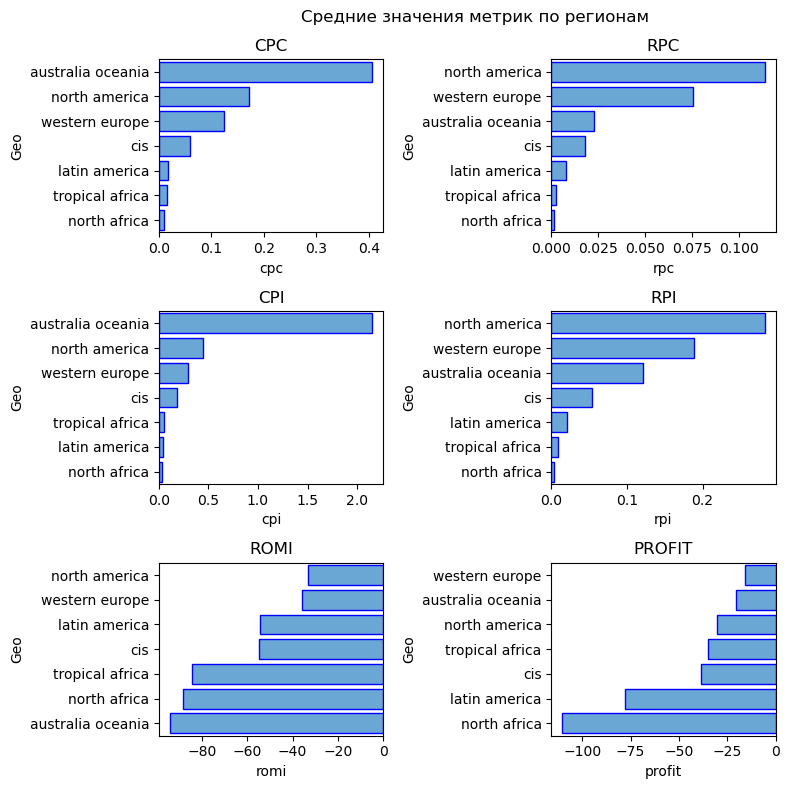

1. Африка, австралия-океания, латинская америка
    * По имеющимся немногочисленным данным, в африке, океании - самая низкая окупаемость рекламных кампаний (ROMI), самый низкий profit. Ни один проект не вышел в плюс. Так же эти регионы имеют самую низкую цену за клик/скачивание. CPC ~0.02.
    * ROMI в африке и океании достигает значения от -85% и меньше.
    * Выручка с клика и скачивания в африке и океании почти равна 0.
    * У латинской америки эффективность кампаний лишь немного лучше. ROMI = -55%
    * У австралии океании самая большая стоимость клика - 0.4.
2. СНГ
    * Более высокие CPC, RPC и т.д. Однако окупаемость ROMI на уровне латинской америки. CPC = 0.05, RPC = 0.02, CPI = 0.2 RPI = 0.55.
3. Европа, Америка
    * Имеют наибольшую эффективность среди всех остальных регионов, наименьшие убытки, наибольшую выручку, также большие цены за клик и скачивание.
    * Кампании в которые вложили больше всего средств показали самые большие убытки.
    
Помимо этого, было предположение, что конверсия к клику, скачиванию или регистрации зависит от региона. Как оказалось это не так, во всех регионах практически одинаковые значения.

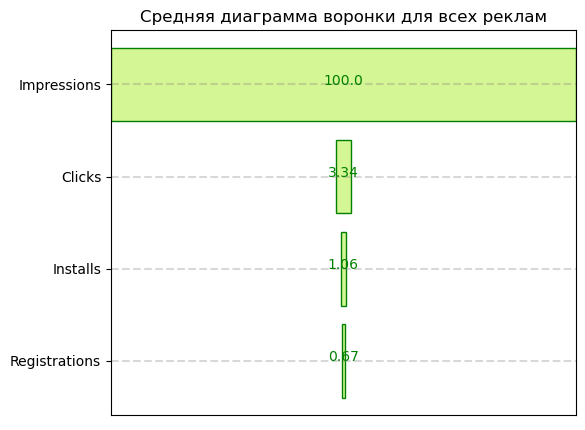

Единственное, у австралии-океании конверсия на регистрацию почти в 2 раза ниже чем в других регионах.

Также из важного, определили, что все успешные кампании были рассчитаны на америку и европу:

In [45]:
pd.pivot_table(positive, index='Geo', values=['romi'], aggfunc=['mean', 'count']).reset_index()

,Geo,mean,count
,,romi,romi
0,north america,46.832887,7
1,western europe,49.220764,4


Далее мы проанализировали эффективность реклам в их продолжительности.

Более половины рекламных кампаний за месяц набирают максимум 1 покупателя, соответственно покупок в половине кампаний тоже нет, даже самые дорогие кампании в основном (более 90% от всей выручки) приносят с рекламы а не с покупок. Это касается даже эффективных кампаний.

Данные рекламные кампании призвали наибольшее количество покупателей:

Так же мы просмотрели эффективность жизни рекламы по каждой стране и построили следующий график:

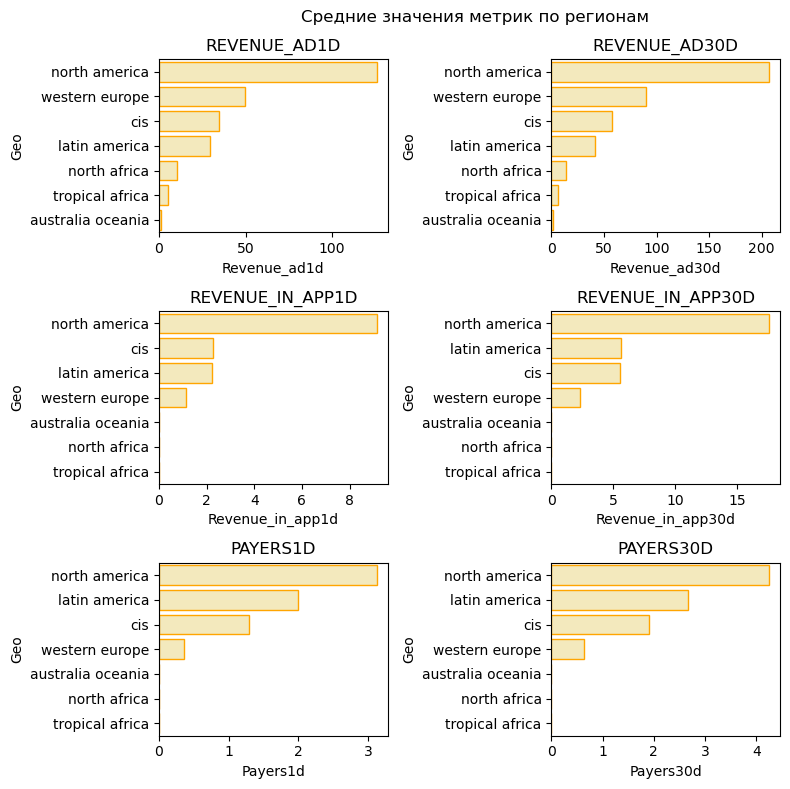

1. Регионы африки, океании не дают ни покупателей, ни соответственно покупок на протяжении месяца.
2. Высокие показатели по выручке с рекламы у америки (с большим отрывом) - ~130 за первый день, ~200 к 30 дню. Далее Европа (50, 100) и СНГ (40, 60).
3. За покупки в приложении, по сути, отвечает один регион, америка. Средняя кампания в америке дает выручку 17 за 30 дней, что все еще мало по сравнению с выручки с рекламы.

### Медиабайеры.

Успешность рекламной кампании мы определяли по метрикам ROMI и Profit, так же мы оценили и медиабайеров:

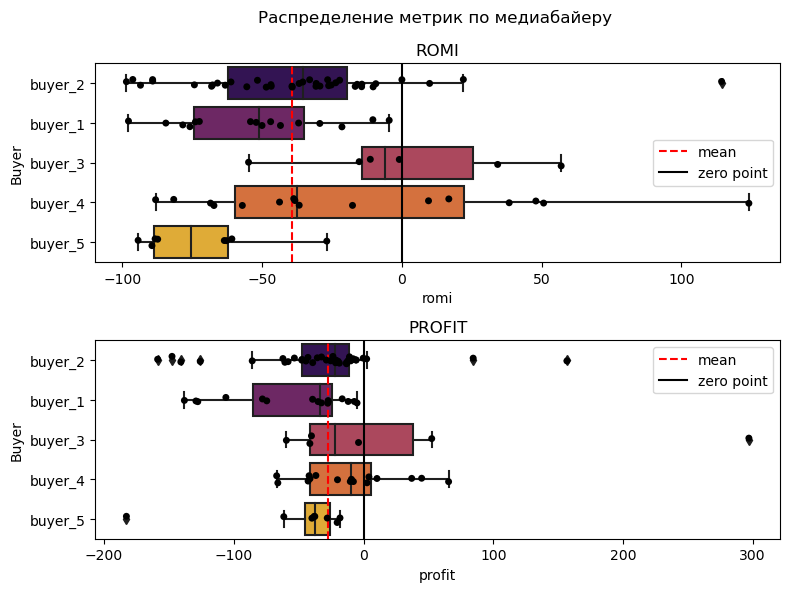

In [46]:
df[['Buyer', 'profit', 'romi']].groupby('Buyer').mean()

,profit,romi
Buyer,,
buyer_1,-162.358458,-51.542116
buyer_2,-31.821779,-37.185238
buyer_3,34.124815,1.460683
buyer_4,-11.157915,-15.656286
buyer_5,-53.261801,-71.688519


In [47]:
pd.pivot_table(data=df, index='Buyer', values='Payers30d', aggfunc=['sum', 'mean'])

,sum,mean
,Payers30d,Payers30d
Buyer,,
buyer_1,124,6.888889
buyer_2,79,2.025641
buyer_3,26,4.333333
buyer_4,14,0.875000
buyer_5,2,0.250000


* buyer_1:
    * организовал две самые дорогие и масштабные, но самые убыточные кампании.
* buyer_2:
    * имеет наибольший опыт - 39 кампаний, имеет средние метрики *ROMI* и *Profit*
    * организовал одни из самых эффективных рекламных кампаний.
* buyer_3:
    * **имеет наибольшную окупаемость расходов** (101% в среднем), но имеет самое калое количество организованных кампаний - 6.
    * организовал одни из самых эффективных рекламных кампаний.
    * имеет положительную среднюю прибыль по всем кампаниям, а также в среднем привлекает немало покупателей.
* buyer_4:
    * имеет и низкие, и высокие *ROMI*, но при этом не сильно большие убытки.
* buyer_5:
    * имеет наименьшую *ROMI*, но с маленькими убытками.

# Конец ☺️